In [1]:
import yt
from matplotlib import rc_context
from matplotlib.animation import FuncAnimation
import numpy as np
import matplotlib.pyplot as plt
import sys
import matplotlib
unit_base={"length_unit": (1e18,"cm"), "time_unit": (1e10,"s"), "mass_unit": (1e26,"g")}
matplotlib.get_backend()
# matplotlib.use('TkAgg')
# matplotlib.get_backend()

'module://matplotlib_inline.backend_inline'

In [30]:
unit_base={"length_unit": (1.0,"kpc"), "time_unit": (1.0,"Myr"), "mass_unit": (1,"g")}
ds = yt.load("../test/kh_custom.out1.00025.athdf", units_override=unit_base)
ds.derived_field_list

yt : [WARNING  ] 2024-11-13 13:17:55,856 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-11-13 13:17:55,857 Overriding length_unit: 1.0 kpc.
yt : [INFO     ] 2024-11-13 13:17:55,858 Overriding time_unit: 1.0 Myr.
yt : [INFO     ] 2024-11-13 13:17:55,859 Overriding mass_unit: 1 g.
yt : [WARNING  ] 2024-11-13 13:17:55,860 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-11-13 13:17:55,884 Parameters: current_time              = 0.2544677
yt : [INFO     ] 2024-11-13 13:17:55,884 Parameters: domain_dimensions         = [512 256 256]
yt : [INFO     ] 2024-11-13 13:17:55,885 Parameters: domain_left_edge          = [-36. -18. -18.]
yt : [INFO     ] 2024-11-13 13:17:55,885 Parameters: domain_right_edge         = [36. 18. 18.]
yt : [INFO     ] 2024-11-13 13:17:55,886 Parameters: cosmological_simulation   = 0


[('athena_pp', 'cell_volume'),
 ('athena_pp', 'dx'),
 ('athena_pp', 'dy'),
 ('athena_pp', 'dz'),
 ('athena_pp', 'path_element_x'),
 ('athena_pp', 'path_element_y'),
 ('athena_pp', 'path_element_z'),
 ('athena_pp', 'press'),
 ('athena_pp', 'rho'),
 ('athena_pp', 'vel1'),
 ('athena_pp', 'vel2'),
 ('athena_pp', 'vel3'),
 ('athena_pp', 'volume'),
 ('athena_pp', 'x'),
 ('athena_pp', 'y'),
 ('athena_pp', 'z'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gr

yt : [INFO     ] 2024-11-13 13:18:22,350 Projection completed
yt : [INFO     ] 2024-11-13 13:18:22,351 xlim = -36.000000 36.000000
yt : [INFO     ] 2024-11-13 13:18:22,351 ylim = -18.000000 18.000000
yt : [INFO     ] 2024-11-13 13:18:22,352 xlim = -36.000000 36.000000
yt : [INFO     ] 2024-11-13 13:18:22,353 ylim = -18.000000 18.000000
yt : [INFO     ] 2024-11-13 13:18:22,353 Making a fixed resolution buffer of (('athena_pp', 'press')) 800 by 800



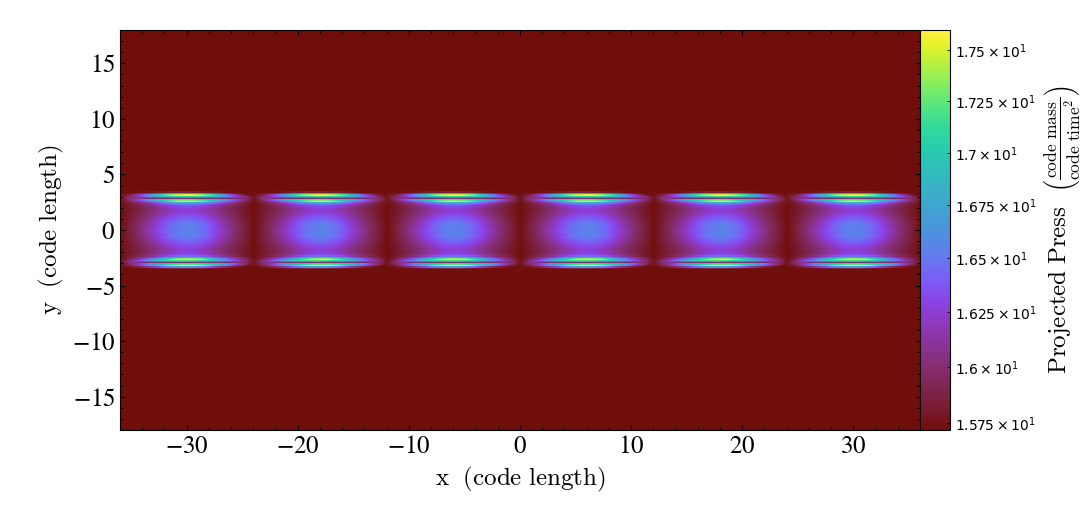

In [34]:
plot = yt.ProjectionPlot(ds, 'z', ('athena_pp', 'press'), center='c')
# plot.set_width((100, 'kpc'))
# yt.ProjectionPlot(ds, 'z', ('athena_pp', 'rho'))
# plot.set_log(('athena_pp', 'vel2'), False)
plot.show()

In [33]:
frb = ds.r[::512j, ::256j, 0]
data = frb['athena_pp', 'press']
# data = data.reshape(*data.shape[::-1], 1)
print(np.max(data), np.min(data))

yt : [INFO     ] 2024-11-13 13:18:10,017 Making a fixed resolution buffer of (('athena_pp', 'press')) 512 by 256


2.721795082092285 code_mass/(code_length*code_time**2) 0.0647692009806633 code_mass/(code_length*code_time**2)


In [54]:
frb = yt.FixedResolutionBuffer(ds.slice('z', 0), (-6, 6, -3, 3), (2048, 1024))

In [3]:
slc = ds.slice('z', 0)
slc['athena_pp', 'rho'].d
plt.imshow(slc['athena_pp', 'rho'].d.reshape(1024, 2048))
plt.show()
plt.imshow(frb['athena_pp', 'rho'].d)
plt.show()
print(slc.get_data(fields=('athena_pp', 'rho')))
# frb['density'].d.shape

2024-10-12 19:46:47.703 python[43521:3607665] +[IMKClient subclass]: chose IMKClient_Legacy
2024-10-12 19:46:47.703 python[43521:3607665] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


NameError: name 'frb' is not defined

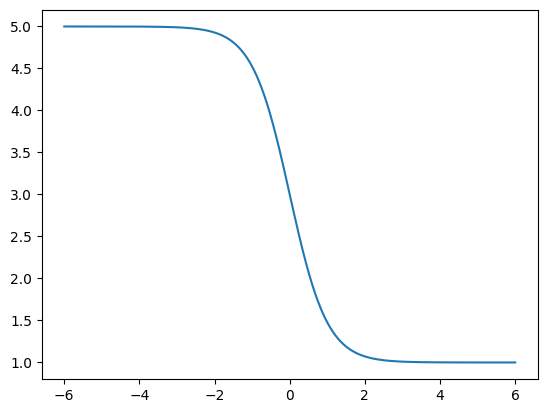

In [63]:
x = np.linspace(-6, 6, 2048)
contrast = 5
plt.plot(x, -np.tanh(x) * ((contrast-1) / 2) + ((contrast - 1) / 2 + 1) )

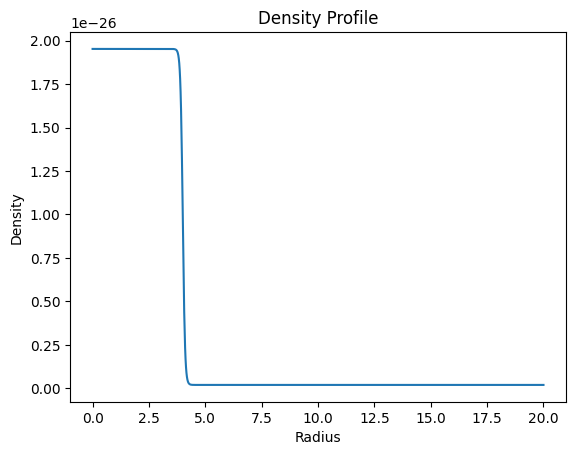

np.float64(1.952456891178e-26)

In [79]:
n_e = 1.e-4
mu_e = 1.166667
m_H = 1.673534e-24
rho_0 = n_e * mu_e * m_H
density_contrast = 100
smoothing_thickness = 0.1
# rho_0 = 1e-24
r = np.linspace(0, 20, 1000)
radius = 4

def density(r):
    # return rho_0 * (-np.tanh((r-radius)/smoothing_thickness) * ((density_contrast-1) / 2) + ((density_contrast - 1) / 2 + 1) )
    return rho_0 * ((density_contrast / 2) + 0.5 +
                                 (density_contrast - 1.0) * 0.5 * -np.tanh((r - radius) / smoothing_thickness))

plt.title("Density Profile")
plt.xlabel("Radius")
plt.ylabel("Density")
plt.plot(r, density(r))
# plt.ylim(1e-28, 1e-25)
plt.show() 
density(0) / density(20)
density(0)

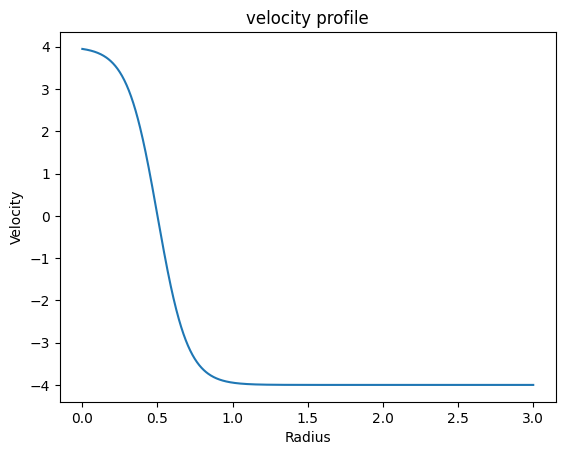

In [15]:
vel_shear = 4
smoothing_thickness_vel = 0.2

def velocity(r):
    return vel_shear * -1 * (np.tanh((r-radius)/smoothing_thickness_vel) )


plt.title("velocity profile")
plt.xlabel("Radius")
plt.ylabel("Velocity")
plt.plot(r, velocity(r))

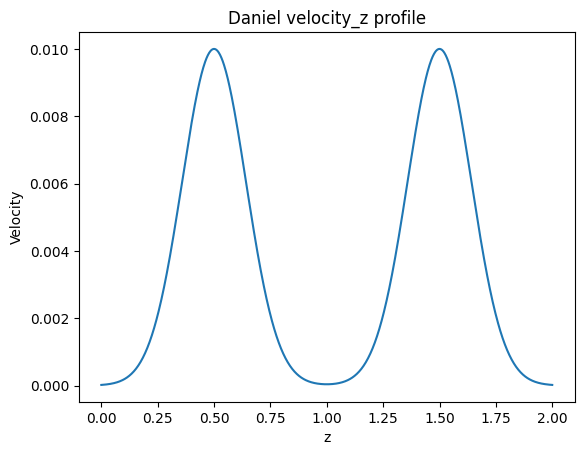

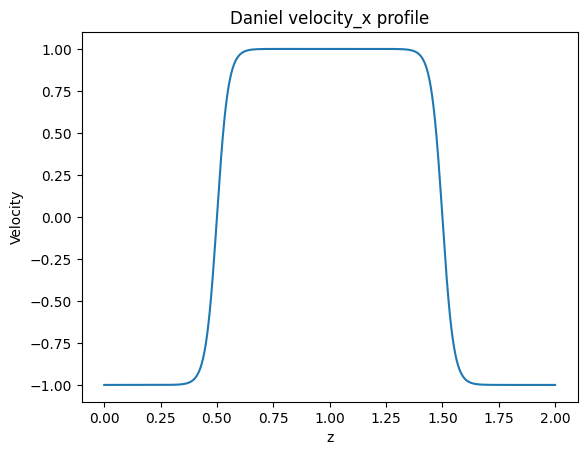

In [5]:
z = np.linspace(0, 2, 1000)
z1 = 0.5
z2 = 1.5
A = 0.01
x = 0.25
pert = A*np.sin(2*np.pi*x)
sigma = 0.2
a = 0.05
u_flow = 1

def vel_x(z):
    return u_flow * (np.tanh((z-z1)/a) - np.tanh((z-z2)/a) - 1)

def vel_z(z):
    return pert * (np.exp(-((z-z1)/sigma)**2)+np.exp(-((z-z2)/sigma)**2))

plt.title("Daniel velocity_z profile")
plt.xlabel("z")
plt.ylabel("Velocity")
plt.plot(z, vel_z(z))
plt.show()

plt.title("Daniel velocity_x profile")
plt.xlabel("z")
plt.ylabel("Velocity")
plt.plot(z, vel_x(z))
plt.show()

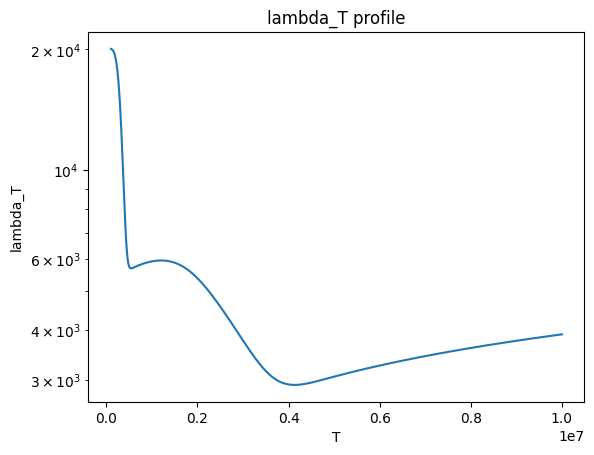

In [35]:
T_cold = 0.1
T_hot = 10
T = np.linspace(1e5, 1e7, 10000)
def Lambda_cool(temperature):
    Lambda = 4.7 * np.exp(-1 * np.pow(temperature / 3.5e5, 4.5))
    Lambda += 0.313 * np.pow(temperature, 0.08) * np.exp(-1 * np.pow(temperature / 3e6, 4.4))
    Lambda += 6.42 * np.pow(temperature, -0.2) * np.exp(-1 * np.pow(temperature / 2.1e6, 4.4))
    Lambda += 0.00439 * np.pow(temperature, 0.35)
    Lambda *= 1e-22
    Lambda *= 1e12  #convert to code units (10^-12 ergs)
    Lambda *= (31557600 * 1e6)
    return Lambda

plt.title("lambda_T profile")
plt.xlabel("T")
plt.ylabel("lambda_T")
plt.plot(T, Lambda_cool(T))
plt.yscale('log')
plt.show()
# lambda_T(0.1)

In [ ]:
def test(x):
    return np.cos(x) - np.cos(3*x)

x = 